In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [3]:
prices=pd.read_csv("C:/Users/kusuma/Downloads/House prices.csv")

In [5]:
#data understanding
prices.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0


In [6]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            505 non-null    int64  
 1   baths           505 non-null    float64
 2   size            505 non-null    float64
 3   size_units      505 non-null    object 
 4   lot_size        428 non-null    float64
 5   lot_size_units  428 non-null    object 
 6   zip_code        505 non-null    int64  
 7   price           505 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 31.7+ KB


In [7]:
prices.size

4040

In [13]:
prices.shape

(505, 8)

In [15]:
prices.isnull()
prices.tail()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
500,5,4.5,5580.0,sqft,0.30,acre,98146,3800000.0
501,3,2.5,1390.0,sqft,1570.00,sqft,98126,575000.0
502,3,2.5,2950.0,sqft,0.47,acre,98118,3105000.0
503,5,5.0,3010.0,sqft,4887.00,sqft,98115,1807000.0
504,3,2.0,1301.0,sqft,3000.00,sqft,98103,895000.0


In [17]:
prices.dropna()
prices

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0
...,...,...,...,...,...,...,...,...
500,5,4.5,5580.0,sqft,0.30,acre,98146,3800000.0
501,3,2.5,1390.0,sqft,1570.00,sqft,98126,575000.0
502,3,2.5,2950.0,sqft,0.47,acre,98118,3105000.0
503,5,5.0,3010.0,sqft,4887.00,sqft,98115,1807000.0


In [19]:
k=prices['beds'].unique()
print(k)

[3 4 2 1 7 5 9 6]


In [21]:
prices=pd.read_csv("C:/Users/kusuma/Downloads/House prices.csv")

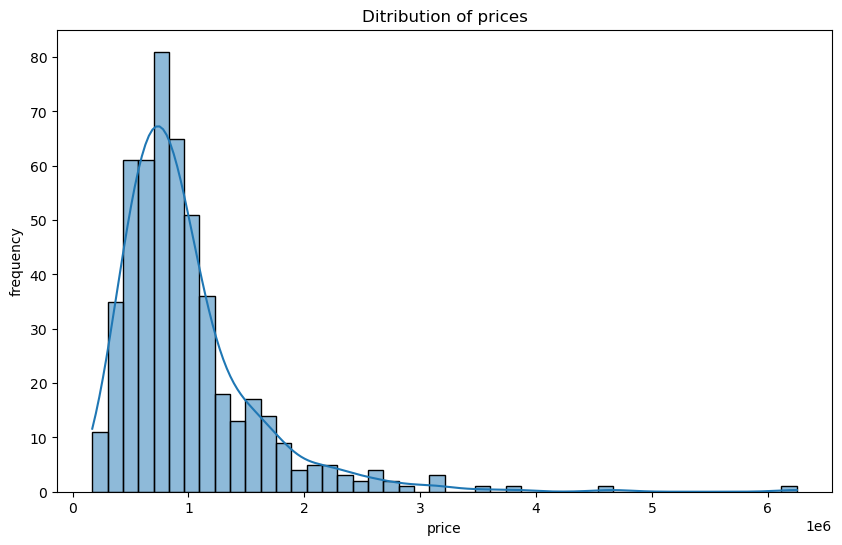

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(prices['price'],kde=True)
plt.title('Ditribution of prices')
plt.xlabel('price')
plt.ylabel('frequency')
plt.show()

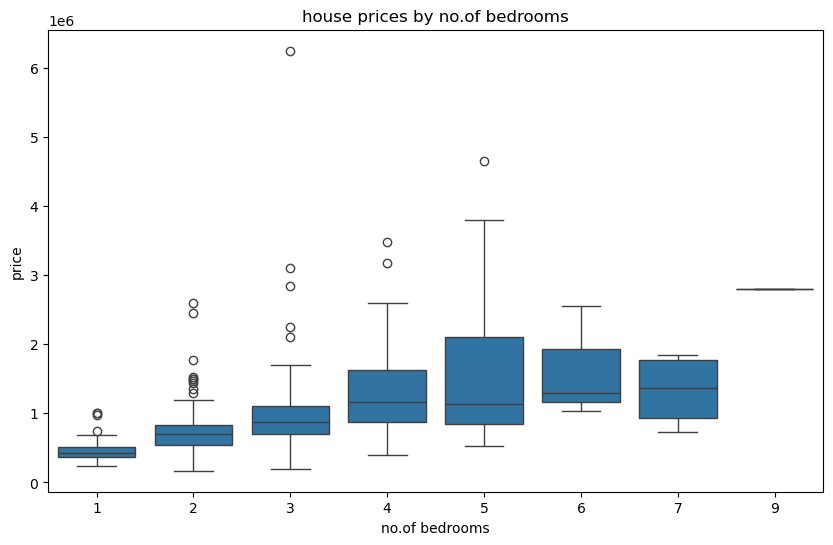

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x='beds',y='price',data=prices)
plt.title('house prices by no.of bedrooms')
plt.xlabel('no.of bedrooms')
plt.ylabel('price')
plt.show()

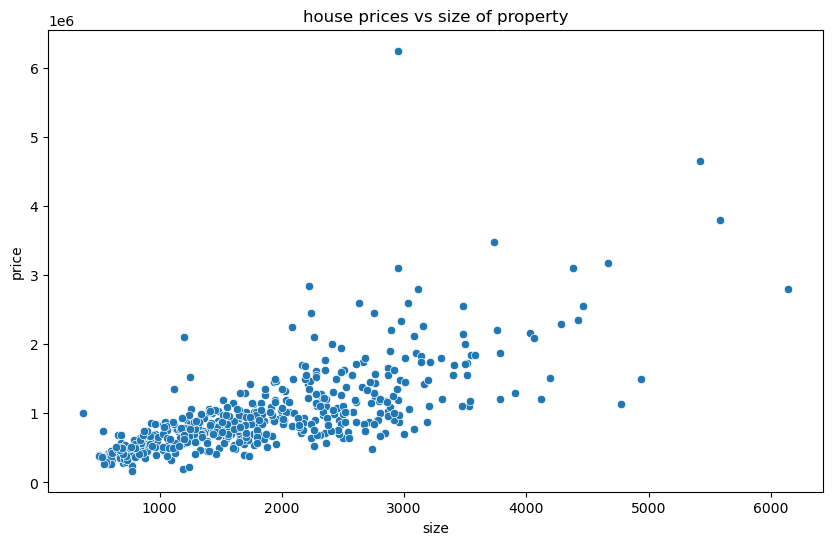

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='size',y='price',data=prices)
plt.title('house prices vs size of property')
plt.xlabel('size')
plt.ylabel('price')
plt.show()

In [27]:
#data preprocessing
prices.dropna(inplace=True)
prices.isnull().sum()

beds              0
baths             0
size              0
size_units        0
lot_size          0
lot_size_units    0
zip_code          0
price             0
dtype: int64

In [30]:
prices.columns

Index(['beds', 'baths', 'size', 'size_units', 'lot_size', 'lot_size_units',
       'zip_code', 'price'],
      dtype='object')

In [33]:
prices=prices.drop(['size_units','lot_size_units','zip_code'],axis=1)

In [35]:
#assigning x and y
x=prices.drop('price',axis=1)
y=prices.drop('price',axis=1)

In [37]:
#train test split
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=47)

In [39]:
features = ['beds', 'baths', 'size', 'lot_size', 'zip_code']
target = 'price'

In [41]:
print(prices.columns)

Index(['beds', 'baths', 'size', 'lot_size', 'price'], dtype='object')


In [43]:
if 'lot_size_units' in prices.columns:
    prices.loc[prices['lot_size_units'] == 'acre', 'lot_size'] *= 43560  # Convert acres to sqft
    prices = prices.drop(columns=['lot_size_units'])

In [45]:
prices.columns = prices.columns.str.strip().str.lower()
print(prices.columns)

Index(['beds', 'baths', 'size', 'lot_size', 'price'], dtype='object')


In [47]:
features = ['beds', 'baths', 'size', 'lot_size', 'zipcode']

In [49]:
features = ['beds', 'baths', 'size', 'lot_size']

In [51]:
prices = prices[features + [target]].dropna()

In [53]:
X = prices[features]
y = prices[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [61]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [63]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [64]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Performance:")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.2f}")
    print("-" * 40)

In [67]:
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")

Linear Regression Performance:
Mean Absolute Error (MAE): 238519.06
R² Score: 0.70
----------------------------------------
Decision Tree Performance:
Mean Absolute Error (MAE): 425767.40
R² Score: -0.85
----------------------------------------
Random Forest Performance:
Mean Absolute Error (MAE): 260131.28
R² Score: 0.54
----------------------------------------


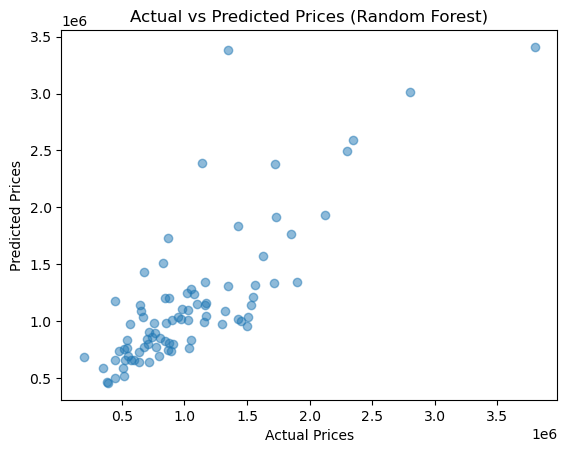

In [69]:
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Random Forest)")
plt.show()

In [90]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree MSE: {mse_dt}")
print(f"Decision Tree R^2 Score: {r2_dt}")

# Evaluate Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R^2 Score: {r2_rf}")


Decision Tree MSE: 615232032905.3024
Decision Tree R^2 Score: -0.8537537505095085
Random Forest MSE: 151708318654.2079
Random Forest R^2 Score: 0.5428881305794803


In [92]:
mae_dt = mean_absolute_error(y_test, y_pred_dt)
print(f"Decision Tree MAE: {mae_dt}")

# Evaluate Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest MAE: {mae_rf}")


Decision Tree MAE: 425767.3953488372
Random Forest MAE: 260131.28348837214
